In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 200)

ROOT = Path.cwd()

TRAIN_INTERIM = r"C:\fraudguard-ai\data\raw\train.csv"
TEST_INTERIM  = r"C:\fraudguard-ai\data\raw\test.csv"

print("ROOT:", ROOT)
print("Train path:", TRAIN_INTERIM)
print("Test path:", TEST_INTERIM)

df = pd.read_csv(TRAIN_INTERIM, parse_dates=["trans_date_trans_time", "dob"])
df_test = pd.read_csv(TEST_INTERIM, parse_dates=["trans_date_trans_time", "dob"])

print("Loaded train:", df.shape)
print("Loaded test:", df_test.shape)


ROOT: c:\fraudguard-ai\notebooks
Train path: C:\fraudguard-ai\data\raw\train.csv
Test path: C:\fraudguard-ai\data\raw\test.csv
Loaded train: (1296675, 23)
Loaded test: (555719, 23)


In [3]:

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())
print("Missing values:\n", df.isna().sum())
print("Duplicates:", df.duplicated().sum())


Shape: (1296675, 23)
Columns: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        

In [4]:
print(df['is_fraud'].value_counts())
print("Fraud %:", df['is_fraud'].mean() * 100)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
Fraud %: 0.5788651743883394


                count          mean           std           min           25%  \
Unnamed: 0  1296675.0  6.483370e+05  3.743180e+05  0.000000e+00  3.241685e+05   
cc_num      1296675.0  4.171920e+17  1.308806e+18  6.041621e+10  1.800429e+14   
amt         1296675.0  7.035104e+01  1.603160e+02  1.000000e+00  9.650000e+00   
zip         1296675.0  4.880067e+04  2.689322e+04  1.257000e+03  2.623700e+04   
lat         1296675.0  3.853762e+01  5.075808e+00  2.002710e+01  3.462050e+01   
long        1296675.0 -9.022634e+01  1.375908e+01 -1.656723e+02 -9.679800e+01   
city_pop    1296675.0  8.882444e+04  3.019564e+05  2.300000e+01  7.430000e+02   
unix_time   1296675.0  1.349244e+09  1.284128e+07  1.325376e+09  1.338751e+09   
merch_lat   1296675.0  3.853734e+01  5.109788e+00  1.902779e+01  3.473357e+01   
merch_long  1296675.0 -9.022646e+01  1.377109e+01 -1.666712e+02 -9.689728e+01   
is_fraud    1296675.0  5.788652e-03  7.586269e-02  0.000000e+00  0.000000e+00   

                     50%   

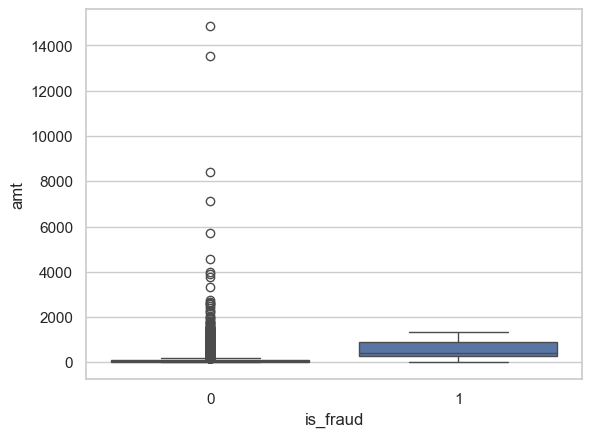

In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[num_cols].describe().T)

print("\nFraud vs Non-Fraud Amount Stats:")
print(df.groupby('is_fraud')['amt'].describe())

sns.boxplot(x='is_fraud', y='amt', data=df.sample(50000))
plt.show()

In [6]:
for col in ['merchant','category','gender','job']:
    if col in df.columns:
        print(f"Top {col} values:", df[col].value_counts().head())
        print("Fraud rate:", df.groupby(col)['is_fraud'].mean().head())

Top merchant values: merchant
fraud_Kilback LLC    4403
fraud_Cormier LLC    3649
fraud_Schumm PLC     3634
fraud_Kuhn LLC       3510
fraud_Boyer PLC      3493
Name: count, dtype: int64
Fraud rate: merchant
fraud_Abbott-Rogahn                 0.001627
fraud_Abbott-Steuber                0.003403
fraud_Abernathy and Sons            0.002284
fraud_Abshire PLC                   0.004749
fraud_Adams, Kovacek and Kuhlman    0.004255
Name: is_fraud, dtype: float64
Top category values: category
gas_transport    131659
grocery_pos      123638
home             123115
shopping_pos     116672
kids_pets        113035
Name: count, dtype: int64
Fraud rate: category
entertainment    0.002478
food_dining      0.001651
gas_transport    0.004694
grocery_net      0.002948
grocery_pos      0.014098
Name: is_fraud, dtype: float64
Top gender values: gender
F    709863
M    586812
Name: count, dtype: int64
Fraud rate: gender
F    0.005262
M    0.006426
Name: is_fraud, dtype: float64
Top job values: job
Film/

In [7]:
print("Fraud rate by category:", df.groupby("category")['is_fraud'].mean().sort_values(ascending=False).head(20))
print("Fraud rate by merchant:", df.groupby("merchant")['is_fraud'].mean().sort_values(ascending=False).head(20))

Fraud rate by category: category
shopping_net      0.017561
misc_net          0.014458
grocery_pos       0.014098
shopping_pos      0.007225
gas_transport     0.004694
misc_pos          0.003139
grocery_net       0.002948
travel            0.002864
entertainment     0.002478
personal_care     0.002424
kids_pets         0.002114
food_dining       0.001651
home              0.001608
health_fitness    0.001549
Name: is_fraud, dtype: float64
Fraud rate by merchant: merchant
fraud_Kozey-Boehm                       0.025723
fraud_Herman, Treutel and Dickens       0.025385
fraud_Kerluke-Abshire                   0.022307
fraud_Brown PLC                         0.022109
fraud_Goyette Inc                       0.021616
fraud_Terry-Huel                        0.021543
fraud_Jast Ltd                          0.021505
fraud_Schmeler, Bashirian and Price     0.020833
fraud_Boyer-Reichert                    0.019916
fraud_Langworth, Boehm and Gulgowski    0.019807
fraud_Moore, Dibbert and Koepp     

Fraud rate by hour:
 hour
0     0.014940
1     0.015349
2     0.014652
3     0.014239
4     0.001099
5     0.001423
6     0.000946
7     0.001327
8     0.001153
9     0.001114
10    0.000946
11    0.000998
12    0.001027
13    0.001225
14    0.001325
15    0.001208
16    0.001156
17    0.001192
18    0.001226
19    0.001236
20    0.000952
21    0.001129
22    0.028829
23    0.028374
Name: is_fraud, dtype: float64

Fraud rate by day_of_week:
 day_of_week
0    0.004648
1    0.005835
2    0.006554
3    0.006844
4    0.007086
5    0.006106
6    0.004853
Name: is_fraud, dtype: float64

Fraud rate on weekends vs weekdays:
 is_weekend
0    0.005991
1    0.005410
Name: is_fraud, dtype: float64

Fraud rate at night vs day:
 is_night
0    0.001153
1    0.015092
Name: is_fraud, dtype: float64


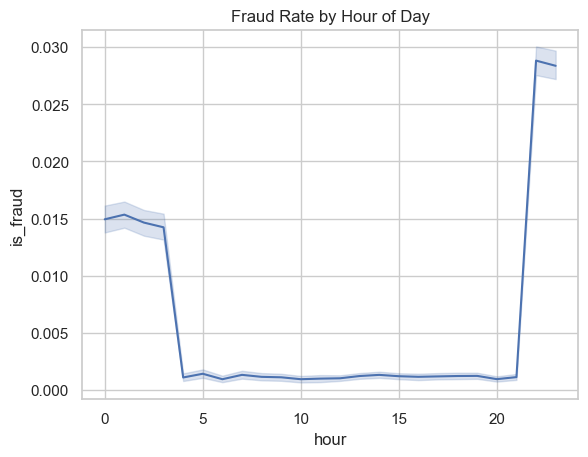

In [8]:

df['hour'] = df['trans_date_trans_time'].dt.hour

df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 22 or x <= 6) else 0)

print("Fraud rate by hour:\n", df.groupby("hour")['is_fraud'].mean())
print("\nFraud rate by day_of_week:\n", df.groupby("day_of_week")['is_fraud'].mean())
print("\nFraud rate on weekends vs weekdays:\n", df.groupby("is_weekend")['is_fraud'].mean())
print("\nFraud rate at night vs day:\n", df.groupby("is_night")['is_fraud'].mean())

sns.lineplot(data=df, x="hour", y="is_fraud")
plt.title("Fraud Rate by Hour of Day")
plt.show()


In [9]:
print("Fraud rate by state:", df.groupby("state")['is_fraud'].mean().sort_values(ascending=False).head(20))
print("Fraud by city population bucket:", df.groupby(pd.qcut(df['city_pop'], 10))['is_fraud'].mean())

Fraud rate by state: state
DE    1.000000
RI    0.027273
AK    0.016981
NV    0.008382
CO    0.008141
OR    0.008012
TN    0.007975
NE    0.007448
ME    0.007210
NH    0.007127
OH    0.006906
KS    0.006784
VA    0.006769
NY    0.006647
SC    0.006612
FL    0.006585
MN    0.006527
VT    0.006118
SD    0.006005
MD    0.005994
Name: is_fraud, dtype: float64
Fraud by city population bucket: city_pop
(22.999, 260.0]          0.006182
(260.0, 566.0]           0.005725
(566.0, 964.0]           0.005363
(964.0, 1631.0]          0.005479
(1631.0, 2456.0]         0.005453
(2456.0, 4680.0]         0.005986
(4680.0, 10076.0]        0.005536
(10076.0, 42384.0]       0.006492
(42384.0, 186140.0]      0.005182
(186140.0, 2906700.0]    0.006523
Name: is_fraud, dtype: float64


C:\Users\akash\AppData\Local\Temp\ipykernel_32732\2450586950.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Fraud by city population bucket:", df.groupby(pd.qcut(df['city_pop'], 10))['is_fraud'].mean())


In [10]:
tx_per_user = df.groupby("first")['amt'].count().sort_values(ascending=False)
print("Top users by transactions:", tx_per_user.head(20))

df_sorted = df.sort_values(["first", "trans_date_trans_time"])
df_sorted['time_diff'] = df_sorted.groupby("first")["trans_date_trans_time"].diff().dt.total_seconds()

print(df_sorted[['first','time_diff','is_fraud']].head())

Top users by transactions: first
Christopher    26669
Robert         21667
Jessica        20581
James          20039
Michael        20009
David          19965
Jennifer       16940
William        16371
Mary           16346
John           16325
Margaret       15312
Joseph         14792
Daniel         13867
Lisa           13767
Amanda         13310
Ashley         13296
Jeffrey        12831
Michelle       12601
Samuel         12179
Kimberly       11815
Name: amt, dtype: int64
     first  time_diff  is_fraud
29   Aaron        NaN         0
84   Aaron     2398.0         0
136  Aaron     2175.0         0
221  Aaron     3919.0         0
589  Aaron    17710.0         0


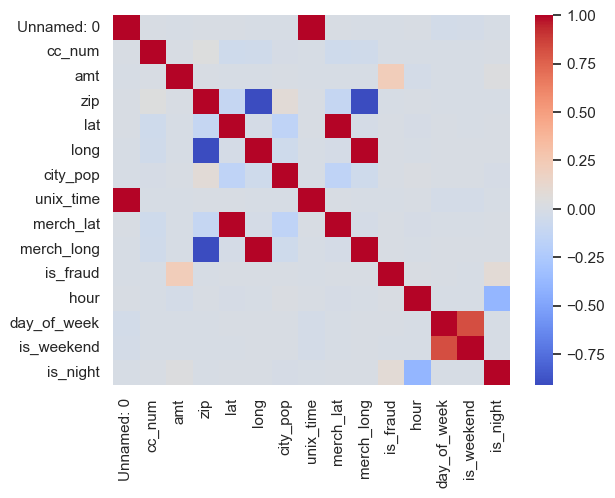

In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[num_cols].corr(), cmap="coolwarm")
plt.show()

In [12]:

df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

print("Age statistics:")
print(df['age'].describe())

print("\nFraud rate by age bucket:")
print(df.groupby(pd.qcut(df['age'], 10))['is_fraud'].mean())

print("\nTop risky jobs (highest fraud rate):")
print(df.groupby("job")['is_fraud'].mean().sort_values(ascending=False).head(15))


Age statistics:
count    1.296675e+06
mean     4.552822e+01
std      1.740895e+01
min      1.300000e+01
25%      3.200000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.500000e+01
Name: age, dtype: float64

Fraud rate by age bucket:


C:\Users\akash\AppData\Local\Temp\ipykernel_32732\3047731651.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(pd.qcut(df['age'], 10))['is_fraud'].mean())


age
(12.999, 25.0]    0.006189
(25.0, 30.0]      0.005389
(30.0, 34.0]      0.004153
(34.0, 39.0]      0.004555
(39.0, 44.0]      0.004000
(44.0, 47.0]      0.004518
(47.0, 53.0]      0.006749
(53.0, 60.0]      0.007815
(60.0, 70.0]      0.006419
(70.0, 95.0]      0.008279
Name: is_fraud, dtype: float64

Top risky jobs (highest fraud rate):
job
Broadcast journalist                 1.0
Sales promotion account executive    1.0
Armed forces technical officer       1.0
Legal secretary                      1.0
Industrial buyer                     1.0
Personnel officer                    1.0
Forest/woodland manager              1.0
Homeopath                            1.0
Information officer                  1.0
Engineer, site                       1.0
Solicitor                            1.0
Ship broker                          1.0
Contracting civil engineer           1.0
Warehouse manager                    1.0
Accountant, chartered                1.0
Name: is_fraud, dtype: float64


In [13]:
user_stats = df.groupby("first")['amt'].agg(['count','mean','std','max']).sort_values('count', ascending=False).head(20)
print(user_stats)

             count       mean         std       max
first                                              
Christopher  26669  72.593408  233.269936  27390.12
Robert       21667  65.888593  134.705408   6136.65
Jessica      20581  71.367828  123.459775   4154.78
James        20039  70.958761  165.404159  12025.30
Michael      20009  72.513412  120.846097   3777.63
David        19965  67.594844  149.058923   6818.74
Jennifer     16940  72.276678  187.576889  14238.11
William      16371  71.661266  126.197177   8160.10
Mary         16346  72.734935  142.610836   8749.44
John         16325  72.741275  152.233219   8059.02
Margaret     15312  74.507528  131.198628   4547.60
Joseph       14792  73.467169  148.017171   8895.57
Daniel       13867  69.506082  158.379190   7772.82
Lisa         13767  64.086725  148.932053   5669.13
Amanda       13310  72.258855  155.715647   9197.47
Ashley       13296  74.455634  123.315348   2978.18
Jeffrey      12831  75.382729  130.966203   7812.76
Michelle    

In [14]:
merchant_stats = df.groupby("merchant")['amt'].agg(['count','mean','std']).sort_values('count', ascending=False).head(20)
print(merchant_stats)

print("High fraud merchants:", df.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False).head(20))

                                      count       mean         std
merchant                                                          
fraud_Kilback LLC                      4403  88.820838   61.529941
fraud_Cormier LLC                      3649  72.658241  168.823472
fraud_Schumm PLC                       3634  70.517983  156.704805
fraud_Kuhn LLC                         3510  80.400897  213.478884
fraud_Boyer PLC                        3493  75.774666  181.320459
fraud_Dickinson Ltd                    3434  56.081768   97.182412
fraud_Cummerata-Jones                  2736  63.643922   15.776336
fraud_Kutch LLC                        2734  63.462056   15.852232
fraud_Olson, Becker and Koch           2723  63.420944   16.053850
fraud_Stroman, Hudson and Erdman       2721  63.864454   16.035156
fraud_Rodriguez Group                  2716  63.495740   15.906235
fraud_Jenkins, Hauck and Friesen       2705  63.654969   15.878206
fraud_Erdman-Kertzmann                 2705  63.311956   15.95

In [15]:
rule = (df['amt'] > df['amt'].quantile(0.99)) & (df['is_night']==1)
print("High amount + night fraud rate:", df.loc[rule,'is_fraud'].mean())

High amount + night fraud rate: 0.511744966442953


In [16]:
df_sorted = df.sort_values(["first","trans_date_trans_time"])
df_sorted['time_diff'] = df_sorted.groupby("first")['trans_date_trans_time'].diff().dt.total_seconds()
print(df_sorted[['first','trans_date_trans_time','time_diff','is_fraud']].head())

     first trans_date_trans_time  time_diff  is_fraud
29   Aaron   2019-01-01 00:22:18        NaN         0
84   Aaron   2019-01-01 01:02:16     2398.0         0
136  Aaron   2019-01-01 01:38:31     2175.0         0
221  Aaron   2019-01-01 02:43:50     3919.0         0
589  Aaron   2019-01-01 07:39:00    17710.0         0


In [17]:
print("Fraud hotspots by state:", df[df['is_fraud']==1]['state'].value_counts().head(20))

user_states = df.groupby("first")['state'].nunique().sort_values(ascending=False)
print("Users with cross-state activity:", user_states.head(20))

Fraud hotspots by state: state
NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
VA    198
SC    193
MO    191
NE    180
WI    163
AR    161
MD    157
KS    156
KY    155
OR    149
Name: count, dtype: int64
Users with cross-state activity: first
Christopher    18
Robert         15
David          14
Mary           12
Jessica        11
William        11
Jennifer       11
Michael        10
Daniel         10
John           10
Christine       9
Joseph          8
Amanda          8
Jeffrey         8
Melissa         8
James           8
Steven          8
Michelle        7
Nathan          7
Sarah           7
Name: state, dtype: int64


In [18]:
from scipy.stats import pointbiserialr

num_cols = df.select_dtypes(include=[np.number]).columns
corr_list = []

for col in num_cols:
    if col != "is_fraud":
        corr, p = pointbiserialr(df[col], df["is_fraud"])
        corr_list.append((col, corr))

sorted_corr = sorted(corr_list, key=lambda x: abs(x[1]), reverse=True)
sorted_corr


[('amt', np.float64(0.21940388895886895)),
 ('is_night', np.float64(0.08656551826942598)),
 ('hour', np.float64(0.0137993705234471)),
 ('age', np.float64(0.012243558783684329)),
 ('unix_time', np.float64(-0.0050776333223338955)),
 ('Unnamed: 0', np.float64(-0.004767475532650925)),
 ('is_weekend', np.float64(-0.0036442697176504685)),
 ('zip', np.float64(-0.0021619072819661534)),
 ('city_pop', np.float64(0.0021359024181982307)),
 ('lat', np.float64(0.0018939555104843003)),
 ('merch_lat', np.float64(0.0017406268494944022)),
 ('day_of_week', np.float64(0.0017391117582485143)),
 ('merch_long', np.float64(0.0017213204008219478)),
 ('long', np.float64(0.001720812751525034)),
 ('cc_num', np.float64(-0.0009814556127222644))]

In [19]:
df["distance_km"] = np.sqrt(
    (df["lat"] - df["merch_lat"])**2 + (df["long"] - df["merch_long"])**2
) * 111  
df.groupby("is_fraud")["distance_km"].describe()


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,84.987332,31.609032,0.026492,62.708948,88.613672,108.507085,156.883442
1,7506.0,85.168223,31.270703,0.739037,62.960890,88.458663,108.379791,155.477148


In [20]:
user_fraud_rate = df.groupby("first")["is_fraud"].mean().sort_values(ascending=False)
user_fraud_rate.head(20)


first
Traci        1.000000
Austin       1.000000
Samantha     1.000000
Angelica     1.000000
Arthur       1.000000
Ashlee       1.000000
Phyllis      1.000000
Molly        1.000000
Calvin       1.000000
Colleen      1.000000
Cameron      1.000000
Deanna       1.000000
Meagan       1.000000
Chelsea      1.000000
Dennis       1.000000
Sydney       0.047970
Bradley      0.035815
Gabriella    0.029762
Angie        0.029358
Walter       0.028355
Name: is_fraud, dtype: float64